In [1]:
import numpy as np
import matplotlib.pyplot as plt
from gurobipy import Model, GRB, quicksum

In [2]:
rnd = np.random
rnd.seed(0)

n = 7  # number of clients
xc = rnd.rand(n + 1) * 200  # x-coordinate of clients and the depot
yc = rnd.rand(n + 1) * 100  # y-coordinate of clients and the depo
xc[0] = 20  # Set the depot to a very far location
yc[0] = 25  # Set the depot to a very far location
N = [i for i in range(1, n+1)]  # Customers
V = [0] + N
A = [(i, j) for i in V for j in V if i != j]  # Edges between each pair of dots
c = {(i, j): np.hypot(xc[i] - xc[j], yc[i] - yc[j]) for i, j in A}  # Distance
Q = 20  # vehicle capacity
q = {i: rnd.randint(1, 10) for i in N}  # Demand from each customer


mdl = Model('CVRP')
x = mdl.addVars(A, vtype=GRB.BINARY)  # Decision variable for whether an edge should be chosen.
u = mdl.addVars(N, vtype=GRB.CONTINUOUS)  # load of vehicle before it leaves the node

mdl.modelSense = GRB.MINIMIZE
mdl.setObjective(quicksum(x[i, j] * c[i, j] for (i, j) in A))

mdl.addConstrs(
    quicksum(x[i, j] for j in V if j != i) == 1 for i in N)  # only one edge into customer node i
mdl.addConstrs(
    quicksum(x[i, j] for i in V if i != j) == 1 for j in N)  # only one edge out of customer node i
mdl.addConstrs((x[i, j] == 1) >> (u[i] + q[i] == u[j]) for i, j in A if i != 0 and j != 0)
mdl.addConstrs(u[i] >= q[i] for i in N)
mdl.addConstrs(u[i] <= Q for i in N)

mdl.optimize()


Set parameter Username
Academic license - for non-commercial use only - expires 2022-05-28
Gurobi Optimizer version 9.5.1 build v9.5.1rc2 (win64)
Thread count: 2 physical cores, 4 logical processors, using up to 4 threads
Optimize a model with 28 rows, 63 columns and 112 nonzeros
Model fingerprint: 0x15e67f0c
Model has 42 general constraints
Variable types: 7 continuous, 56 integer (56 binary)
Coefficient statistics:
  Matrix range     [1e+00, 1e+00]
  Objective range  [2e+01, 2e+02]
  Bounds range     [1e+00, 1e+00]
  RHS range        [1e+00, 2e+01]
  GenCon rhs range [1e+00, 6e+00]
  GenCon coe range [1e+00, 1e+00]
Presolve added 87 rows and 5 columns
Presolve time: 0.03s
Presolved: 115 rows, 68 columns, 539 nonzeros
Variable types: 26 continuous, 42 integer (42 binary)
Found heuristic solution: objective 1429.3556650

Root relaxation: objective 3.118947e+02, 36 iterations, 0.00 seconds (0.00 work units)

    Nodes    |    Current Node    |     Objective Bounds      |     Work
 Expl 

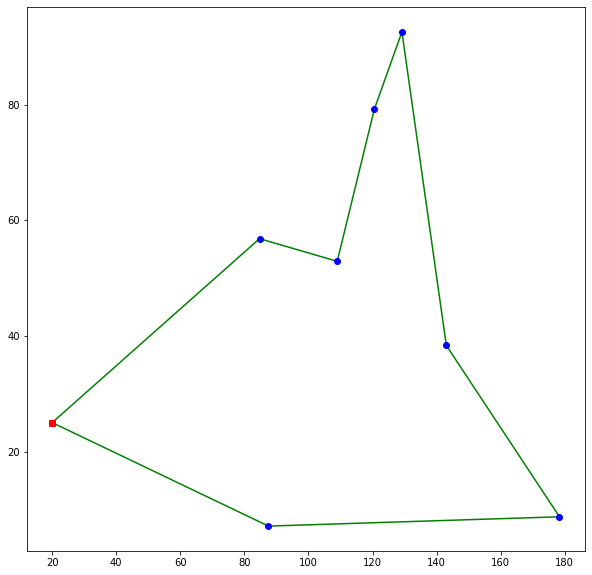

In [3]:
active_arcs = [a for a in A if x[a].X > 0.9]

ax,fig=plt.subplots(figsize=(10,10))
for i, j in active_arcs:
    plt.plot([xc[i], xc[j]], [yc[i], yc[j]], c='g', zorder=0)
plt.plot(xc[0], yc[0], c='r', marker='s')  # Location of the depot
plt.scatter(xc[1:], yc[1:], c='b')  # Location of clients